In [168]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
from datetime import date
import time

**Task**<br>
Nonprofits come to GlobalGiving for many reasons, but what makes them stick around? Our program team is interested in better understanding the retention of nonprofit partners on the platform so they can better design programs to support longer-term relationships. Using the data provided, please put together a short analysis that answers the following questions:
* What metrics might we use to describe organization retention based on this data?
* How might you summarize this data such that a non-technical user could track changes on a monthly basis? These should be static proof-of-concept examples of the kinds of things that could be included in an interactive dashboard or an automatic email report, but should not be interactive or automated for this assignment.</p>


## What metrics might we use to describe organization retention based on this data?
Data analytics are only as good as the data you feed it. Therefore, a quick summary of the necessary data cleaning:
* Corrected negative budget amounts to positive amounts
* Converted the non-profit status from Delinquent - Due Diligence, Emerging, Partner, Leader, Superstar to 0, 1, 2, 3, 4


<h2>Data Download</h2>

In [2]:
df = pd.read_csv('gg_data_v2.csv', encoding = "ISO-8859-1")

In [3]:
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  19754
Columns:  25


In [4]:
print("Columns:")
df.columns.to_list()

Columns:


['id',
 'name',
 'status',
 'country_of_registration',
 'year_founded',
 'original_vetting_approval_date',
 'most_recent_vetting_approval_date',
 'vetting_expiration_date',
 'approx_annual_budget',
 'number_of_currently_active_projects',
 'number_of_funded_projects',
 'number_of_retired_projects',
 'earliest_project_created_date',
 'most_recent_project_created_date',
 'earliest_project_deactivation_date',
 'most_recent_project_deactivation_date',
 'last_login',
 'completed_accelerator_program',
 'number_of_field_visits',
 'most_recent_field_visit_date',
 'all_time_funds_raised',
 'all_time_unique_donors',
 'acquisition_source_category',
 'all_time_unque_project_themes',
 'active_contacts']

In [5]:
df.describe(include='all')

,id,name,status,country_of_registration,year_founded,original_vetting_approval_date,most_recent_vetting_approval_date,vetting_expiration_date,approx_annual_budget,number_of_currently_active_projects,...,most_recent_project_deactivation_date,last_login,completed_accelerator_program,number_of_field_visits,most_recent_field_visit_date,all_time_funds_raised,all_time_unique_donors,acquisition_source_category,all_time_unque_project_themes,active_contacts
count,19754.000000,19754,19754,19741,19284.000000,15881,15880,19546,1.855200e+04,8657.000000,...,4006,19552,19754.000000,1647.000000,1647,1.975400e+04,19754.000000,19041,19025,19754.000000
unique,NaN,19697,5,175,NaN,1839,1667,1841,NaN,NaN,...,3069,19016,NaN,NaN,963,NaN,NaN,16,4817,NaN
top,NaN,Kids In Need Foundation,Delinquent - Due Diligence,United States,NaN,12/19/19,12/19/19,12/19/21,NaN,NaN,...,12/15/16 23:59,9/15/20 11:04,NaN,NaN,7/15/19,NaN,NaN,direct_search,Education,NaN
freq,NaN,2,10044,7773,NaN,900,1070,1070,NaN,NaN,...,20,7,NaN,NaN,10,NaN,NaN,5027,713,NaN
mean,40124.682444,NaN,NaN,NaN,1993.267527,NaN,NaN,NaN,3.080573e+07,0.852027,...,NaN,NaN,0.173129,1.511840,NaN,1.900338e+04,60.321454,NaN,NaN,1.443505
std,23484.272158,NaN,NaN,NaN,103.119640,NaN,NaN,NaN,2.069270e+09,3.240574,...,NaN,NaN,0.378369,0.869183,NaN,1.339661e+05,327.981227,NaN,NaN,1.166394
min,8.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-1.020609e+06,0.000000,...,NaN,NaN,0.000000,1.000000,NaN,-1.800000e+01,0.000000,NaN,NaN,0.000000
25%,17994.750000,NaN,NaN,NaN,1995.000000,NaN,NaN,NaN,2.150000e+04,0.000000,...,NaN,NaN,0.000000,1.000000,NaN,0.000000e+00,0.000000,NaN,NaN,1.000000
50%,38878.500000,NaN,NaN,NaN,2006.000000,NaN,NaN,NaN,1.219390e+05,0.000000,...,NaN,NaN,0.000000,1.000000,NaN,4.000000e+01,1.000000,NaN,NaN,1.000000
75%,59251.250000,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,7.317235e+05,1.000000,...,NaN,NaN,0.000000,2.000000,NaN,5.800000e+03,17.000000,NaN,NaN,2.000000


<h2>Data Cleaning</h2>

**Parse strings into datetimes**

In [6]:
date_cols = ['original_vetting_approval_date',
             'most_recent_vetting_approval_date',
             'vetting_expiration_date',
             'earliest_project_created_date',
             'most_recent_project_created_date',
             'earliest_project_deactivation_date',
             'most_recent_project_deactivation_date',
             'last_login',
             'most_recent_field_visit_date']

In [7]:
df[date_cols] = df[date_cols].apply(pd.to_datetime)

**Zero out negative all time funds and approx annual budget**

In [8]:
df.approx_annual_budget = df.approx_annual_budget.apply(lambda x: abs(x))

In [9]:
df.all_time_funds_raised = df.all_time_funds_raised.apply(lambda x: abs(x))

**Induce float types columns to be float32**

In [10]:
# Functions to help make sense of data
# Check nulls
def check_nulls(df):
    print('Total rows: ' + str(df.shape[0]))
    print('Percent Nulls per Column')
    print((df.isnull().sum()/df.shape[0])*100)

In [11]:
check_nulls(df)

Total rows: 19754
Percent Nulls per Column
id                                        0.000000
name                                      0.000000
status                                    0.000000
country_of_registration                   0.065809
year_founded                              2.379265
original_vetting_approval_date           19.606156
most_recent_vetting_approval_date        19.611218
vetting_expiration_date                   1.052951
approx_annual_budget                      6.084844
number_of_currently_active_projects      56.175964
number_of_funded_projects                56.175964
number_of_retired_projects               56.175964
earliest_project_created_date            56.175964
most_recent_project_created_date         56.175964
earliest_project_deactivation_date       79.720563
most_recent_project_deactivation_date    79.720563
last_login                                1.022578
completed_accelerator_program             0.000000
number_of_field_visits                 

* Based on the above (and barring data quality issues), seems like many non-profit partners get started on the GG Platform, as shown by the high rate of valid last logins, yet most do not create (earliest_creation) and land (easliest_deactivation) projects.
* Subset of columns will likely dictate engagement metrics and/or predictors of retention rather than retention itself, like # of field visits, whether someone completed the accelerator, funds raised
<br><br>
* I have a hunch organization status will be important for understanding the landscape of non-profit partners, and likely will represent a critical retention metric, which is **upgrade rate**. 
* I want to explore how partner characteristics change across org statuses as a way to understand what impacts retention.

<h2>Organization Statuses</h2>

○ **Delinquent - Due Diligence**- Organization was previously a member of the GlobalGiving community, but its vetting has expired. It will need to renew its vetting before being allowed to post projects again.<br>
○ **Emerging** - Organization has completed its initial vetting but is not yet a permanent member of the GlobalGiving community<br>
○ **Partner** - Organization is a vetted, permanent member of the GlobalGiving community<br>
○ **Leader** - Organization is a vetted, permanent member of the GlobalGiving community and has hit certain engagement thresholds<br>
○ **Superstar** - Organization is a vetted, permanent member of the GlobalGiving community and is among our most engaged members<br>


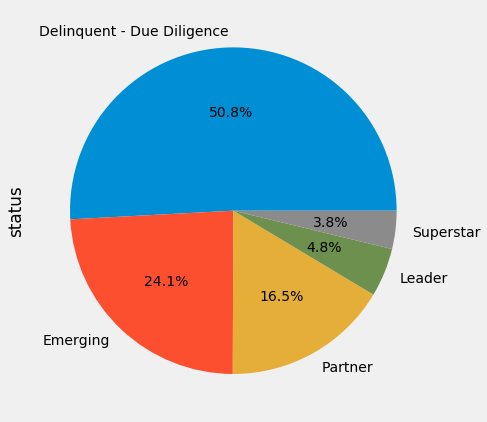

In [12]:
df.status.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.show()

In [13]:
for type in df.status.unique():
    print(type, 'Projects \n')
    check_nulls(df[df.status==type][date_cols])
    print('\n')

Emerging Projects 

Total rows: 4761
Percent Nulls per Column
original_vetting_approval_date           28.712455
most_recent_vetting_approval_date        28.712455
vetting_expiration_date                   0.126024
earliest_project_created_date            67.758874
most_recent_project_created_date         67.758874
earliest_project_deactivation_date       99.369880
most_recent_project_deactivation_date    99.369880
last_login                                0.000000
most_recent_field_visit_date             99.852972
dtype: float64


Partner Projects 

Total rows: 3252
Percent Nulls per Column
original_vetting_approval_date            1.968020
most_recent_vetting_approval_date         1.968020
vetting_expiration_date                   0.584256
earliest_project_created_date            38.745387
most_recent_project_created_date         38.745387
earliest_project_deactivation_date       74.692497
most_recent_project_deactivation_date    74.692497
last_login                                0.

## Encoding Non-Profit Status

To make non-profit status more usable and reflect its meaning as a proxy for retention and value on the GG platform, I'm going to encode it based on how desirable each status is (and knowing there are no nulls).

In [310]:
status_ranking = {'Delinquent - Due Diligence': 0, 'Emerging': 1, 'Partner': 2, 'Leader': 3, 'Superstar': 4}

In [311]:
df['status_encoded'] = [status_ranking[item] for item in df.status]

## Analyzing Funds Raised by Non-Profit Status

In [394]:
grouped = df.groupby(by='status_encoded')['all_time_funds_raised'].mean().reset_index()

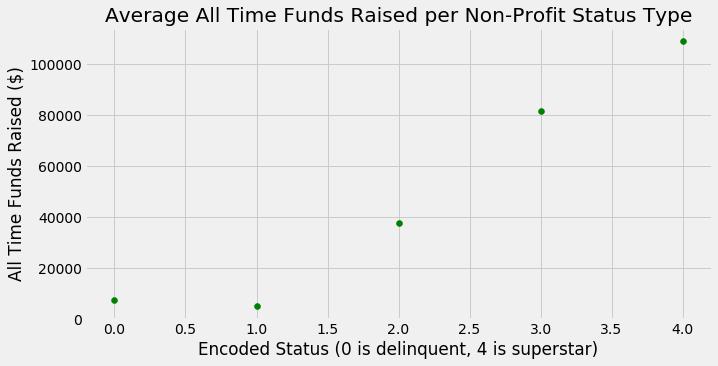

In [402]:
plt.figure(figsize=(10,5))
plt.scatter(x=grouped.status_encoded, y=grouped.all_time_funds_raised, color='green')
plt.title('Average All Time Funds Raised per Non-Profit Status Type')
plt.xlabel('Encoded Status (0 is delinquent, 4 is superstar)')
plt.ylabel('All Time Funds Raised ($)')
plt.show()

In [405]:
annual_budget_grouped = df.groupby(by='status_encoded')['approx_annual_budget'].mean().reset_index()

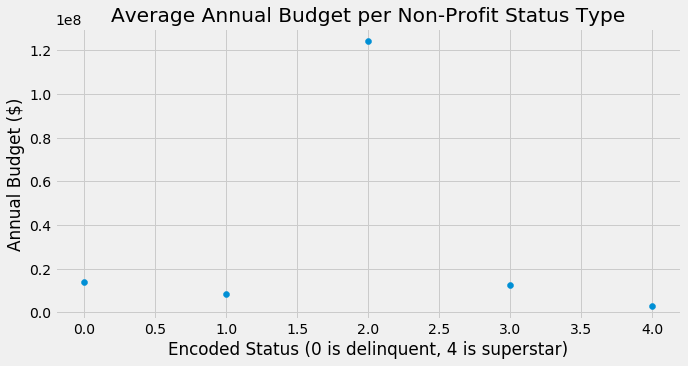

In [406]:
plt.figure(figsize=(10,5))
plt.scatter(x=annual_budget_grouped.status_encoded, y=annual_budget_grouped.approx_annual_budget)
plt.title('Average Annual Budget per Non-Profit Status Type')
plt.xlabel('Encoded Status (0 is delinquent, 4 is superstar)')
plt.ylabel('Annual Budget ($)')
plt.show()

* Avg Annual budget is significantly higher in Partner status, driven by outliers. Also worth noting the negligible trend of annual budget as status improves
* This, later on, could bring up questions into why a partner with such a large budget hasn't reached the higher levels of status, and what its efficacy of budget to donations / impact may be.
    * **Could easily be a case of resources allocated elsewhere, so GG data doesn't show the whole picture**
* I might prioritze these high opex partners, since a slight efficiency improvement could mean a large difference

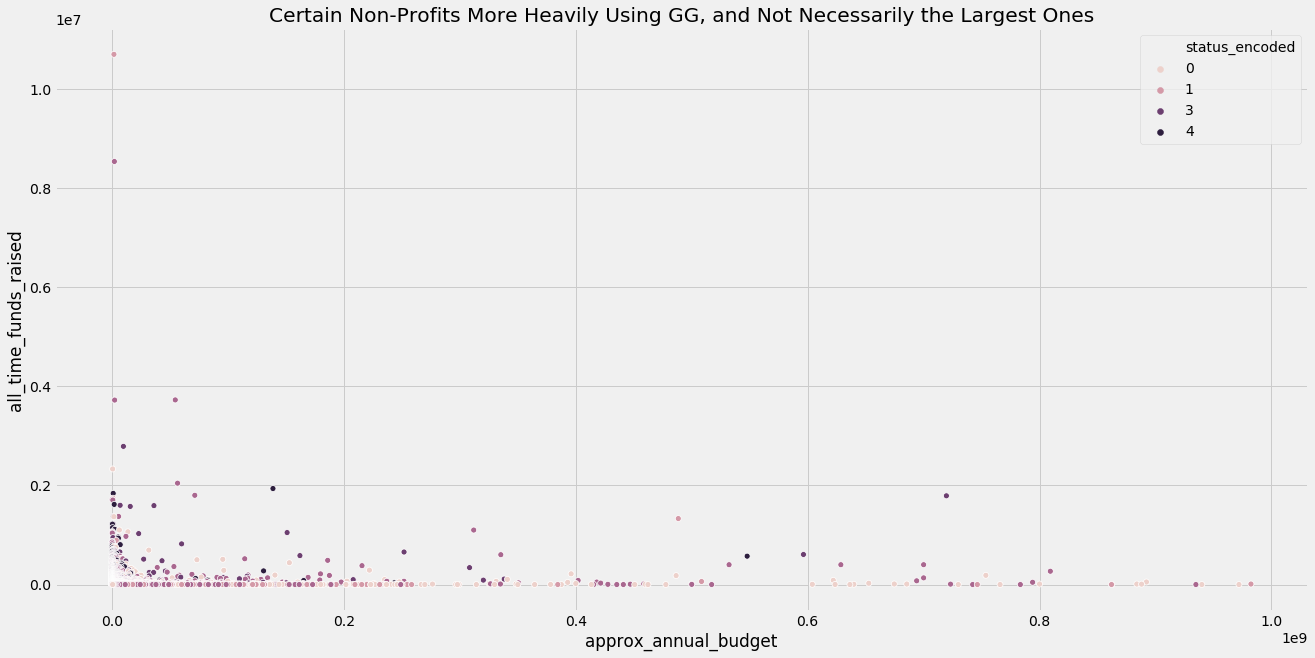

In [407]:
fig, ax = plt.subplots(figsize=(20,10))
# Remove Outliers in annual budget to make chart more readable
sns.scatterplot(data=df[df.approx_annual_budget<1000000000],x='approx_annual_budget', y='all_time_funds_raised', hue='status_encoded', ax=ax)
plt.title('Certain Non-Profits More Heavily Using GG, and Not Necessarily the Largest Ones')
plt.show()

In [391]:
df[['status_encoded','all_time_funds_raised']].sort_values(by='all_time_funds_raised',ascending=False)[:20]

,status_encoded,all_time_funds_raised
0,1,10695785.0
1,2,8534350.0
2,2,3724300.0
3,2,3721322.0
4,3,2787314.0
5,0,2331247.0
6,2,2044679.0
7,4,1936577.0
8,4,1838709.0
9,2,1800011.0


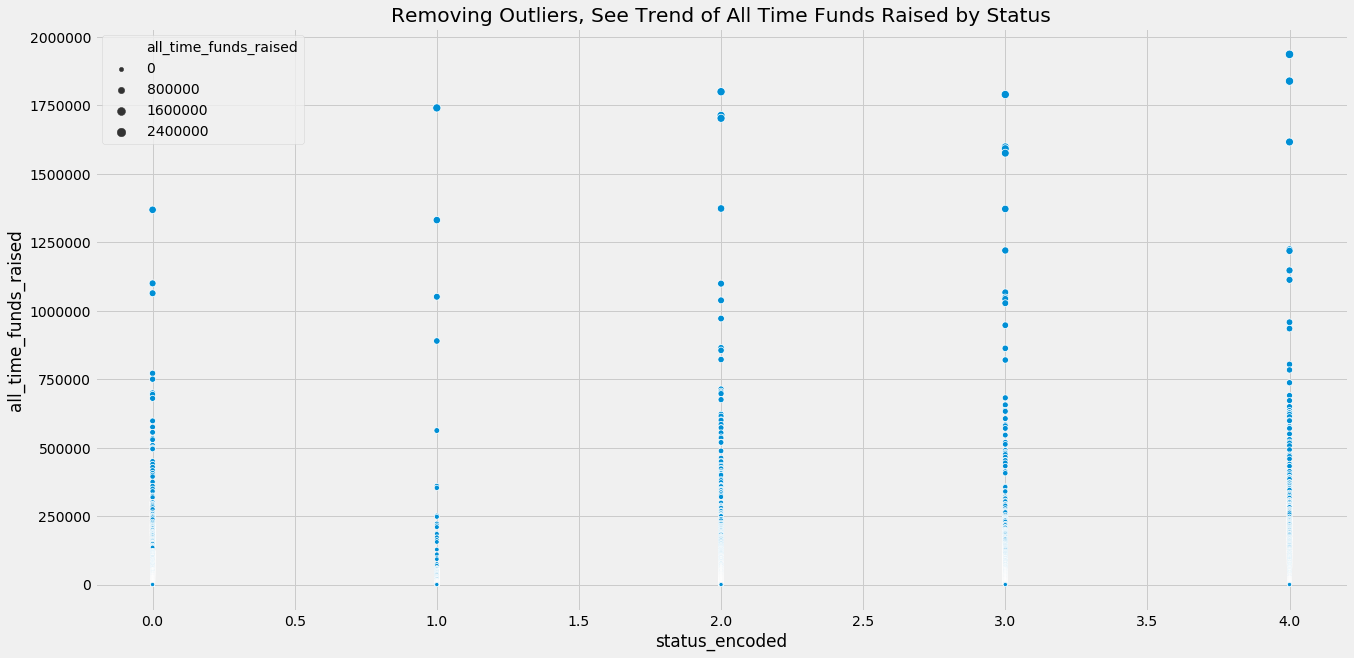

In [393]:
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(data=df[df.all_time_funds_raised < 2000000], x='status_encoded',y='all_time_funds_raised', size='all_time_funds_raised', ax=ax)
plt.title('Removing Outliers, See Trend of All Time Funds Raised by Status')
plt.show()

Two big takeaways from this view:
* Organization status doesn't seem to correlate with budget well... 
* Organizations with large annual budgets are potential; meaning they could be raising much more on GG

Test the assumption about organizations with large budgets using correlation

In [38]:
df[['approx_annual_budget','all_time_funds_raised']].corr(method='spearman')

,approx_annual_budget,all_time_funds_raised
approx_annual_budget,1.000000,0.151181
all_time_funds_raised,0.151181,1.000000


Weak correlation between Annual Budget and All Time Funds Raised

<h2>Metric Definition and Calculation</h2>

I view retention in the context of GlobalGiving in two ways:<br>
#1 Retention for getting on the platform and successfully creating a project
#2 How we retain (and conversely, lose) non-profits as they progress through the status 'funnel'

**#1 Platform Retention**<br>
At GlobalGiving, landing a campaign requires engagement on the part of the partner, and results in a healthy ecosystem of causes for GlobalGiving donors.<br><br> Landing a campaign is best tracked by seeing which non-profits have project deactivation dates. For the purposes of having a single KPI for **platform retention**, I will only look at project deactivation. If a project has a valid deactivation date, they were retained (in the given timeframe). If not, whether its because they never created a project or 'fell out' of the creation process, I consider them not retained.

### Platform Retention

In [318]:
## tiny bit of code to confirm earliest and most recent project deactivation are linked
df[df.most_recent_project_deactivation_date.isna()]['earliest_project_deactivation_date'].nunique()

0

In [319]:
df['launched_proj'] = ~df.most_recent_project_deactivation_date.isna()

In [320]:
df[['most_recent_project_deactivation_date','launched_proj']]

,most_recent_project_deactivation_date,launched_proj
0,NaT,False
1,NaT,False
2,2018-12-22 23:59:00,True
3,2012-06-07 09:34:00,True
4,2020-09-16 23:59:00,True
...,...,...
19749,NaT,False
19750,NaT,False
19751,NaT,False
19752,NaT,False


With the new field launched_proj, can calculate retention based on various groupings, including status

0 Status: % of Non-profits Retained


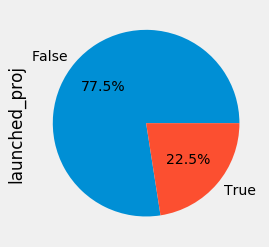

1 Status: % of Non-profits Retained


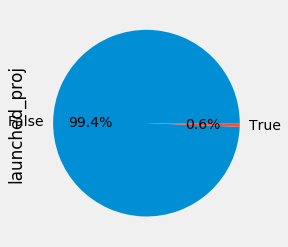

2 Status: % of Non-profits Retained


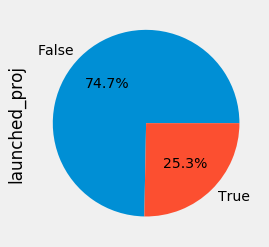

3 Status: % of Non-profits Retained


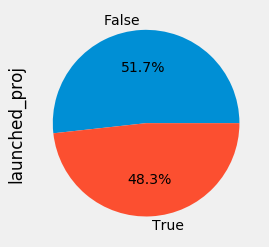

4 Status: % of Non-profits Retained


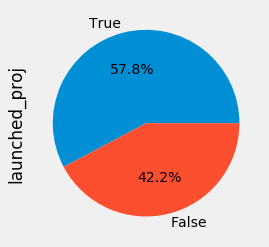

In [331]:
for type in sorted(df.status_encoded.unique()):
    print(type, "Status: % of Non-profits Retained")
    df[df.status_encoded==type].launched_proj.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))
    plt.show()

In addition to the above, I would want to track retention rate (using project landing) over time. The preferred way to do this would be using a cohort analysis based on when non-profits **joined** GlobalGiving. This would require additional data which I'll discuss in my "next version".

### Retention across the 'funnel'

Lastly, I'm going to look at retention across the non-profit 'funnel', meaning as non-profits progress through the increasingly important statuses. Understanding where customers are progressing, or digressing, can help identify areas where we are and are not providing guidance and the resources our non-profits need.

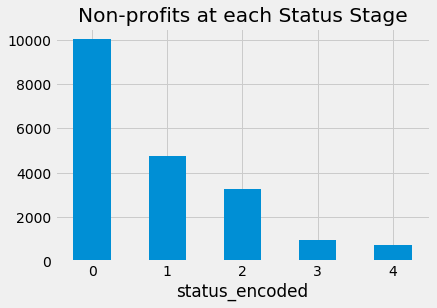

In [332]:
df.groupby('status_encoded')['id'].count().plot(kind='bar')
plt.xticks(rotation='0')
plt.title('Non-profits at each Status Stage')
plt.show()

In [333]:
def progression(vetting_date, last_login, active_projects, deactivated_date):

    today = pd.to_datetime(date.today())
    
    score = 0
    
    if vetting_date > today:
        if (today - last_login).days < 20:
            score += 10
            
            if active_projects >= 1:
                score += 5
                
            if (today - deactivated_date).days > 0:
                score += 5
            
        elif (today - last_login).days < 100:
            score += 5
            
    else:
        score = 0
                

    if score == 20:
        return "Very Likely"
    elif score == 15:
       return "Likely"
    elif score == 10:
       return "Possible"
    elif score == 5:
       return "Unlikely"
    else:
       return "Risk"

In [334]:
df['progression'] = df.apply(lambda row : progression(row['vetting_expiration_date'], row['last_login'], row['number_of_currently_active_projects'], row['most_recent_project_deactivation_date']), axis= 1)

In [335]:
df.progression.value_counts()

Risk           15177
Unlikely        2363
Likely          1214
Very Likely      767
Possible         233
Name: progression, dtype: int64

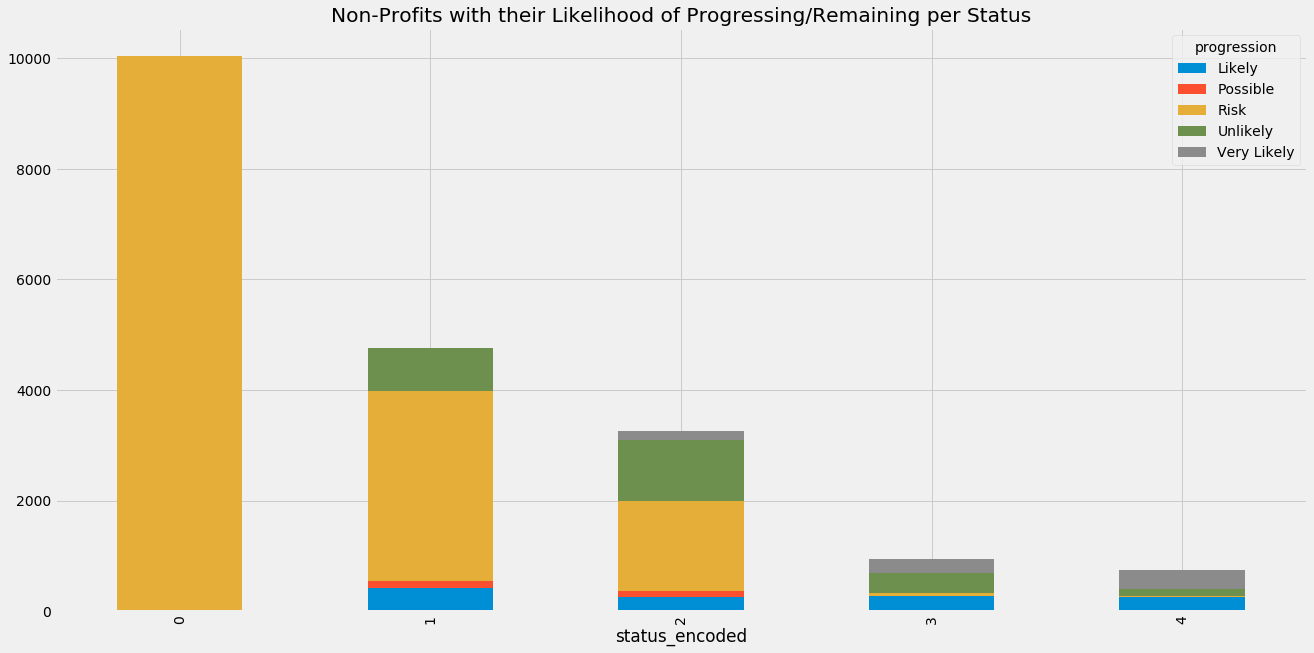

In [337]:
df.groupby(['status_encoded','progression'])['id'].count().unstack().plot(kind='bar', stacked=True, figsize=(20,10))
plt.title('Non-Profits with their Likelihood of Progressing/Remaining per Status')
plt.show()

In [350]:
df.vetting_expiration_date

0       2022-07-08
1       2021-12-17
2       2021-07-18
3       2020-09-17
4       2022-03-19
           ...    
19749   2022-09-06
19750   2022-09-08
19751   2022-09-06
19752   2013-04-21
19753   2016-10-08
Name: vetting_expiration_date, Length: 19754, dtype: datetime64[ns]

In [409]:
for nonprofit in df[(df.progression=='Risk')&(df.status_encoded==4)]['name']:
    print(nonprofit, "is at risk of failing to verify. Please contact the non-profit stakeholder in regards to:")
    print("Vetting Expiration Date:", df[df.name==nonprofit]['vetting_expiration_date'])

Fuel Relief Fund is at risk of failing to verify. Please contact the non-profit stakeholder in regards to:
Vetting Expiration Date: 66   2020-09-17
Name: vetting_expiration_date, dtype: datetime64[ns]
Middle East Children's Alliance is at risk of failing to verify. Please contact the non-profit stakeholder in regards to:
Vetting Expiration Date: 76   2020-09-14
Name: vetting_expiration_date, dtype: datetime64[ns]
Bal Asha Trust is at risk of failing to verify. Please contact the non-profit stakeholder in regards to:
Vetting Expiration Date: 257   2020-09-14
Name: vetting_expiration_date, dtype: datetime64[ns]
Iraqi Children Foundation, Inc. is at risk of failing to verify. Please contact the non-profit stakeholder in regards to:
Vetting Expiration Date: 298   2020-09-14
Name: vetting_expiration_date, dtype: datetime64[ns]
International Association for Human Values (UK) is at risk of failing to verify. Please contact the non-profit stakeholder in regards to:
Vetting Expiration Date: 302